In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
import json

os.chdir('f:/GitHub/icms-prediction/')

os.makedirs('results', exist_ok=True)

assert os.path.exists('data') == True, 'data folder not found. Please create a data folder with data file inside.'

In [6]:
file_name = 'Mini-Consolidado.xlsx'
best_series = ["ARRECADACAO_ICMS_RJ",
               "CESTA_BASICA_RJ",
               "PETROLEO_PRODUCAO_TOTAL",
               "TOTAL_RECEITA_TRIBUTARIA_RJ",
               "ENERGIA_CONSUMO_TOTAL_SUDESTE"]

season = pd.read_excel(f'data/{file_name}', sheet_name='Series', usecols=best_series)
season = season.dropna()
season.head()

,ARRECADACAO_ICMS_RJ,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE,PETROLEO_PRODUCAO_TOTAL,CESTA_BASICA_RJ
12,500791406.0,536079641.0,14099.0,914,98.38
13,492921253.0,550874865.0,13559.0,945,99.22
14,520970514.0,589801849.0,13347.0,959,100.36
15,647593104.0,710412306.0,14114.0,950,101.44
16,518649194.0,580797961.0,13849.0,989,101.18


In [19]:
season.shape

(288, 5)

In [7]:
season = season.drop(season.index[192:204])
season.reset_index(drop=True, inplace=True)
season.head()

,ARRECADACAO_ICMS_RJ,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE,PETROLEO_PRODUCAO_TOTAL,CESTA_BASICA_RJ
0,500791406.0,536079641.0,14099.0,914,98.38
1,492921253.0,550874865.0,13559.0,945,99.22
2,520970514.0,589801849.0,13347.0,959,100.36
3,647593104.0,710412306.0,14114.0,950,101.44
4,518649194.0,580797961.0,13849.0,989,101.18


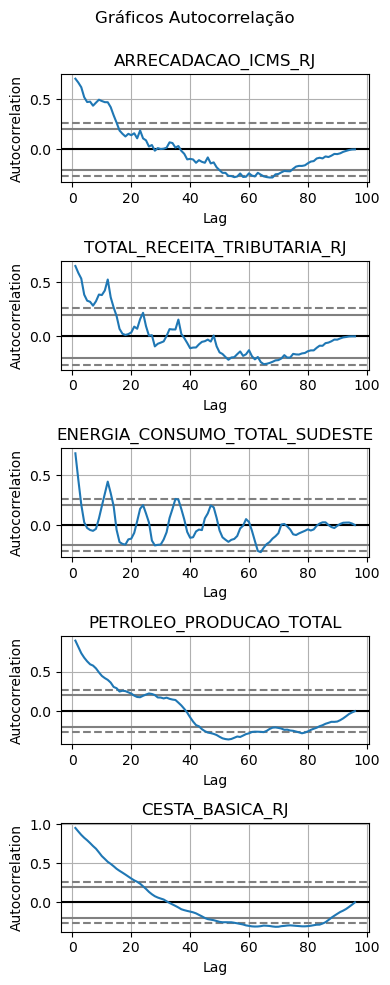

In [8]:
fig, axs = plt.subplots(5, figsize=(4, 10))
fig.suptitle('Gráficos Autocorrelação\n')
for i in range(len(season.columns)):
    ax = axs[i]
    pd.plotting.autocorrelation_plot(season[season.columns[i]][-96:].tolist(), ax=ax)
    ax.set_title(season.columns[i])
    ax.grid(True)
plt.tight_layout()
plt.savefig('imgs/autocorrelation.png')
plt.show()

In [22]:
columns = ["ANO",
           "MES",
           "ARRECADACAO_ICMS_RJ",
           "CESTA_BASICA_RJ",
           "PETROLEO_PRODUCAO_TOTAL",
           "TOTAL_RECEITA_TRIBUTARIA_RJ",
           "ENERGIA_CONSUMO_TOTAL_SUDESTE"]
all_series = pd.read_excel(f'data/{file_name}', sheet_name='Series')
all_series = all_series.dropna()
all_series = all_series.drop(all_series.index[192:204])
trend = all_series[columns].copy()
trend.reset_index(drop=True, inplace=True)
print(trend.shape)
trend.head()

(216, 7)


,ANO,MES,ARRECADACAO_ICMS_RJ,CESTA_BASICA_RJ,PETROLEO_PRODUCAO_TOTAL,TOTAL_RECEITA_TRIBUTARIA_RJ,ENERGIA_CONSUMO_TOTAL_SUDESTE
0,2004.0,1.0,1.668433e+09,166.88,1517,1.971915e+09,14930.0
1,2004.0,2.0,9.665576e+08,161.91,1513,1.261818e+09,14715.0
2,2004.0,3.0,8.956950e+08,158.57,1542,1.176546e+09,14904.0
3,2004.0,4.0,9.638028e+08,153.59,1510,1.164562e+09,15501.0
4,2004.0,5.0,9.587682e+08,160.76,1482,1.121692e+09,14907.0


In [23]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ANO                            216 non-null    float64
 1   MES                            216 non-null    float64
 2   ARRECADACAO_ICMS_RJ            216 non-null    float64
 3   CESTA_BASICA_RJ                216 non-null    float64
 4   PETROLEO_PRODUCAO_TOTAL        216 non-null    int64  
 5   TOTAL_RECEITA_TRIBUTARIA_RJ    216 non-null    float64
 6   ENERGIA_CONSUMO_TOTAL_SUDESTE  216 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.9 KB
